In [20]:

import torch.nn.functional as F 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import clear_output
import matplotlib.colors as mcolors
import matplotlib.patches as mpatch
import numpy as np

overlap = {name for name in mcolors.CSS4_COLORS
           if f'xkcd:{name}' in mcolors.XKCD_COLORS}
color = list(overlap)
import torch


def volumes(boxes,dim=1):
    return F.softplus(boxes.delta_embed).prod(dim)
    
def plot_box(boxes):
    clear_output(wait=True)
    plt.figure(figsize=(10,8))
    
    labels = ['secretory','somatic','pancreatic epsilon','mast','endocrine','epithelial','glandular epithelial','pancreatic epithelial',
         'columnar epithelial','squamous epithelial','endothelial','enteroendocrine','pancreatic acinar','pancreatic ductal',
         'squamous endothelial','PP','pancreatic endocrine','pancreatic beta','pancreatic D','pancreatic alpha']

    color = list(overlap)

    # plot concept embedding
    
    
#         plt.text(x1+w-0.4,x2+h-0.07, labels[i], color = color[i])
        
    ax = plt.gca()
    ax.relim()
    ax.autoscale_view()
    plt.legend(loc="upper right")
    #     plt.savefig('toy_example.pdf', dpi=1200)
    plt.show()




In [2]:
# manhattan_dist
# dist_c

# dist_c[inside].shape
# embed
# embed 

/workspace/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  if sys.path[0] == '':
No handles with labels found to put in legend.


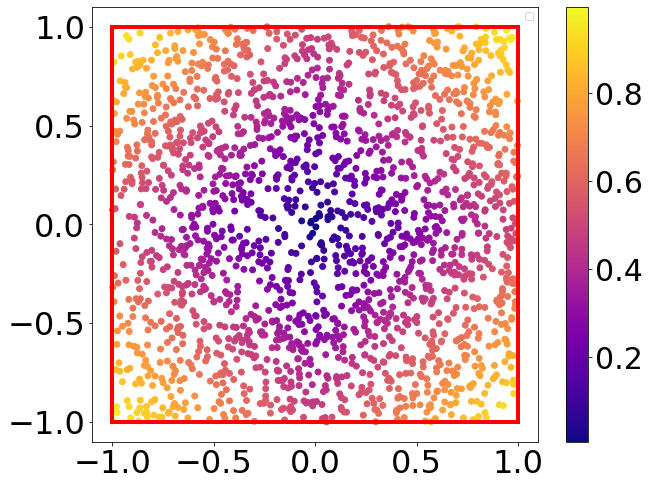

In [30]:

# plot_box(boxes)
import matplotlib.cm as cm

m, M = torch.tensor([[-1.0,-1.0]]), torch.tensor([[1.0,1.0]])
center = m + (M - m)/2
width = F.relu(M - m) 

x1,x2,w,h = m[:,0],m[:,1],M[:,0]-m[:,0], M[:,1]-m[:,1]

plt.figure(figsize=(10,8))
rect=mpatches.Rectangle((x1,x2),w,h, fill = False, color = 'red',linewidth = 4, facecolor=color[0])
plt.gca().add_patch(rect)

x = torch.rand(2000)*2-1
y = torch.rand(2000)*2-1
embed = torch.cat((x.unsqueeze(1),y.unsqueeze(1)),1)

dist_c = torch.norm((embed - center), p=1, dim=-1, keepdim=True)

dist_m = torch.norm((embed - m), p=1, dim=-1,keepdim=True)
dist_M = torch.norm((embed - M), p=1, dim=-1,keepdim=True)
manhattan_dist = torch.norm((M - m),p=1, dim=-1,keepdim=True)
inside = (dist_m + dist_M) <= (manhattan_dist + 1e-4)

dist = (dist_m + dist_M - manhattan_dist)**2

# empty_box = (M - m).min(1)[0].unsqueeze(1)
# empty_dist = F.relu(-empty_box)**2
 

dist[inside] = dist_c[inside]/(manhattan_dist/2)
dist[~inside] = dist_c[~inside] + dist[~inside] 
# dist += empty_dist

plt.scatter(embed[:,0],embed[:,1], c=list(dist[:,0].numpy()), s=35,cmap='plasma')
# plt.contour([embed[:,0], embed[:,1]], dist[:,0],)
cbar = plt.colorbar()

ax = plt.gca()
# ax.relim()
ax.autoscale_view()
plt.legend(loc="upper right")

# plt.axis('off')
plt.xticks(np.arange(-1, 1.01, step=0.5), fontsize=32)
plt.yticks(np.arange(-1, 1.01, step=0.5), fontsize=32)

tick_font_size = 30
cbar.ax.tick_params(labelsize=tick_font_size)

plt.savefig('in_box.pdf', bbox_inches='tight', pad_inches=0, dpi=1200)

plt.show()


In [10]:


# # plot_box(boxes)
# import matplotlib.cm as cm

# m, M = torch.tensor([[10.0,10.0]]), torch.tensor([[-10.0,-10.0]])
# center = m + (M - m)/2
# width = F.relu(M - m) 

# x1,x2,w,h = m[:,0],m[:,1],M[:,0]-m[:,0], M[:,1]-m[:,1]

# plt.figure(figsize=(10,8))
# rect=mpatches.Rectangle((x1,x2),w,h, fill = False, color = 'red',linewidth = 4, facecolor=color[0])
# plt.gca().add_patch(rect)

# x = torch.rand(2000)*20-10
# y = torch.rand(2000)*20-10
# embed = torch.cat((x.unsqueeze(1),y.unsqueeze(1)),1)

# dist_c = torch.norm((embed - center), p=1, dim=-1, keepdim=True)

# dist_m = torch.norm((embed - m), p=1, dim=-1,keepdim=True)
# dist_M = torch.norm((embed - M), p=1, dim=-1,keepdim=True)
# manhattan_dist = torch.norm((M - m),p=1, dim=-1,keepdim=True)
# inside = (dist_m + dist_M) <= (manhattan_dist + 1e-4)

# dist = (dist_m + dist_M - manhattan_dist)**2

# empty_box = (M - m).min(1)[0].unsqueeze(1)
# empty_dist = F.relu(-empty_box)**2

# # volume = F.relu(m-M).prod(1, keepdim=True).clamp(1e-5,1e5)

 

# dist[inside] = dist_c[inside]/(manhattan_dist/2)
# # print(manhattan_dist)
# dist[~inside] = dist_c[~inside] + dist[~inside] 
# dist = dist*(1+empty_dist)

# plt.scatter(embed[:,0],embed[:,1], c=list(dist[:,0].numpy()), s=35,cmap='plasma')
# # plt.contour([embed[:,0], embed[:,1]], dist[:,0],)
# cbar = plt.colorbar()

# ax = plt.gca()
# # ax.relim()
# ax.autoscale_view()
# plt.legend(loc="upper right")

# plt.xticks(fontsize=30)
# plt.yticks(fontsize=30)

# tick_font_size = 30
# cbar.ax.tick_params(labelsize=tick_font_size)

# # plt.savefig('in_box.pdf', bbox_inches='tight', pad_inches=0, dpi=1200)

# plt.show()


/workspace/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  if sys.path[0] == '':
No handles with labels found to put in legend.


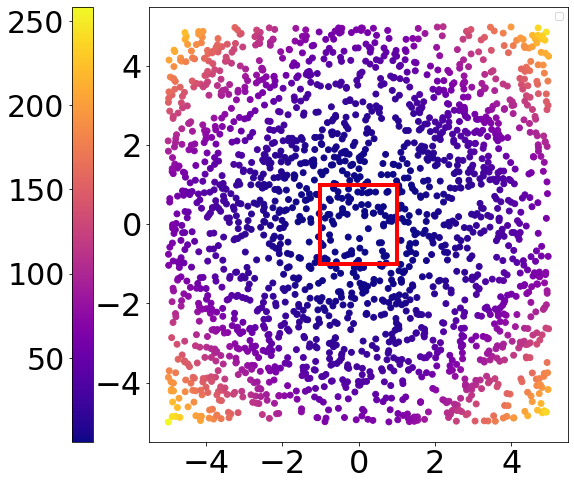

In [29]:

# plot_box(boxes)
import matplotlib.cm as cm

m, M = torch.tensor([[-1.0,-1.0]]), torch.tensor([[1.0,1.0]])
center = m + (M - m)/2
width = F.relu(M - m) + 1

x1,x2,w,h = m[:,0],m[:,1],M[:,0]-m[:,0], M[:,1]-m[:,1]

plt.figure(figsize=(10,8))
rect=mpatches.Rectangle((x1,x2),w,h, fill = False, color = 'red',linewidth = 4, facecolor=color[0])
plt.gca().add_patch(rect)

x = torch.rand(2000)*10-5
y = torch.rand(2000)*10-5
embed = torch.cat((x.unsqueeze(1),y.unsqueeze(1)),1)

dist_c = torch.norm((embed - center)/width, p=1, dim=-1, keepdim=True)

dist_m = torch.norm((embed - m), p=1, dim=-1,keepdim=True)
dist_M = torch.norm((embed - M), p=1, dim=-1,keepdim=True)

manhattan_dist = torch.norm((M - m),p=1, dim=-1,keepdim=True)
inside = (dist_m + dist_M) <= manhattan_dist

dist = ((dist_m + dist_M - manhattan_dist))**2

# empty_box = (M - m).min(1)[0].unsqueeze(1)
# empty_dist = F.relu(-empty_box)**2

dist[inside] = dist_c[inside]
dist[~inside] = dist_c[~inside] + dist[~inside] 
# dist += empty_dist

plt.scatter(embed[:,0],embed[:,1], c=list(dist[:,0].numpy()), s=35,cmap='plasma')
# plt.contour([embed[:,0], embed[:,1]], dist[:,0],)
cbar = plt.colorbar(ticks=None,location='left')

ax = plt.gca()
# ax.relim()
ax.autoscale_view()
plt.legend(loc="upper right")

plt.xticks(fontsize=32)
plt.yticks(fontsize=32)

tick_font_size = 30
cbar.ax.tick_params(labelsize=tick_font_size)


plt.savefig('out_box.pdf', bbox_inches='tight', pad_inches=0, dpi=1200)

# plt.show()




/workspace/anaconda3/lib/python3.7/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
No handles with labels found to put in legend.


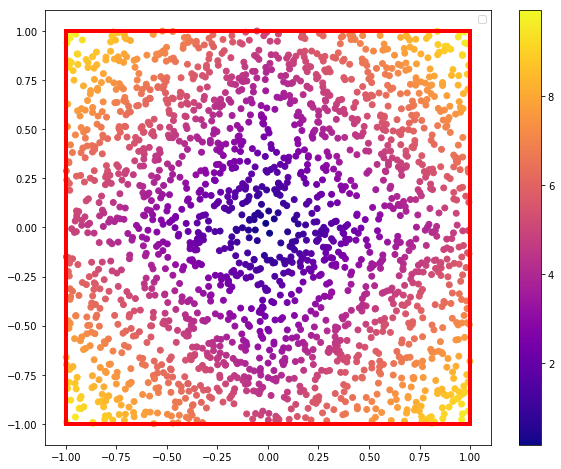

In [30]:

# plot_box(boxes)
import matplotlib.cm as cm

m, M = torch.tensor([[1.0,1.0]]), torch.tensor([[-1.0,-1.0]])
center = m + (M - m)/2
width = F.relu(M - m) + 1

x1,x2,w,h = m[:,0],m[:,1],M[:,0]-m[:,0], M[:,1]-m[:,1]

plt.figure(figsize=(10,8))
rect=mpatches.Rectangle((x1,x2),w,h, fill = False, color = 'red',linewidth = 4, facecolor=color[0])
plt.gca().add_patch(rect)

x = torch.rand(2000)*2-1
y = torch.rand(2000)*2-1
embed = torch.cat((x.unsqueeze(1),y.unsqueeze(1)),1)

dist_c = torch.norm((embed - center)/width, p=1, dim=-1, keepdim=True)

dist_m = torch.norm((embed - m), p=1, dim=-1,keepdim=True)
dist_M = torch.norm((embed - M), p=1, dim=-1,keepdim=True)

manhattan_dist = torch.norm((M - m),p=1, dim=-1,keepdim=True)
inside = (dist_m + dist_M) <= manhattan_dist

dist = ((dist_m + dist_M - manhattan_dist))**2

empty_box = (M - m).min(1)[0].unsqueeze(1)
empty_dist = F.relu(-empty_box)**2

dist[inside] = dist_c[inside]
dist[~inside] = dist_c[~inside] + dist[~inside] 
dist = dist*(1+empty_dist)

plt.scatter(embed[:,0],embed[:,1], c=list(dist[:,0].numpy()), s=35,cmap='plasma')
# plt.contour([embed[:,0], embed[:,1]], dist[:,0],)
plt.colorbar(ticks=None)

ax = plt.gca()
# ax.relim()
ax.autoscale_view()
plt.legend(loc="upper right")
# plt.savefig('out_box.pdf', bbox_inches='tight', pad_inches=0, dpi=1200)

plt.show()




/workspace/anaconda3/lib/python3.7/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
No handles with labels found to put in legend.


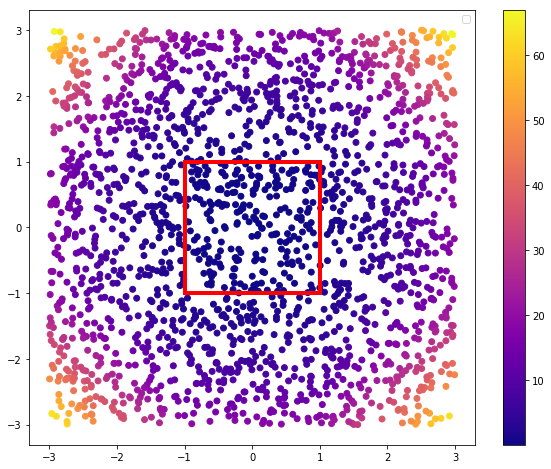

In [7]:

# plot_box(boxes)
import matplotlib.cm as cm

m, M = torch.tensor([[-1.0,-1.0]]), torch.tensor([[1.0,1.0]])
center = m + (M - m)/2
width = F.relu(M - m) 

x1,x2,w,h = m[:,0],m[:,1],M[:,0]-m[:,0], M[:,1]-m[:,1]

plt.figure(figsize=(10,8))
rect=mpatches.Rectangle((x1,x2),w,h, fill = False, color = 'red',linewidth = 4, facecolor=color[0])
plt.gca().add_patch(rect)

x = torch.rand(2000)*6-3
y = torch.rand(2000)*6-3
embed = torch.cat((x.unsqueeze(1),y.unsqueeze(1)),1)

dist_c = torch.norm((embed - center), p=1, dim=-1, keepdim=True)

dist_m = torch.norm((embed - m), p=1, dim=-1,keepdim=True)
dist_M = torch.norm((embed - M), p=1, dim=-1,keepdim=True)
manhattan_dist = torch.norm((M - m),p=1, dim=-1,keepdim=True)
inside = (dist_m + dist_M) <= (manhattan_dist + 1e-4)

dist = (dist_m + dist_M - manhattan_dist)**2

 

dist[inside] = dist_c[inside]/(manhattan_dist/2)
dist[~inside] = dist_c[~inside] + dist[~inside] 
# dist += empty_dist

plt.scatter(embed[:,0],embed[:,1], c=list(dist[:,0].numpy()), s=35,cmap='plasma')
# plt.contour([embed[:,0], embed[:,1]], dist[:,0],)
plt.colorbar()

ax = plt.gca()
# ax.relim()
ax.autoscale_view()
plt.legend(loc="upper right")

# plt.savefig('in_box.pdf', bbox_inches='tight', pad_inches=0, dpi=1200)

plt.show()


/workspace/anaconda3/lib/python3.7/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
No handles with labels found to put in legend.


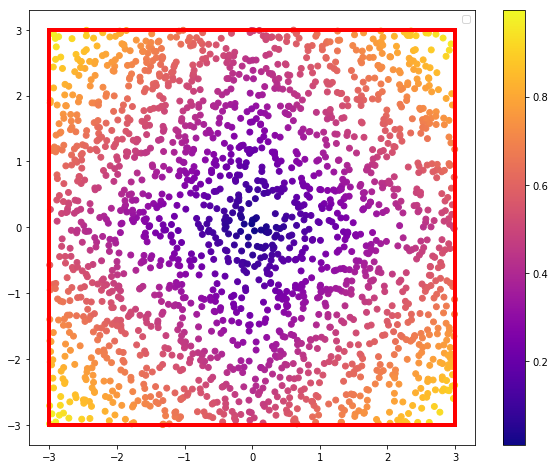

In [13]:

# plot_box(boxes)
import matplotlib.cm as cm

m, M = torch.tensor([[-3.0,-3.0]]), torch.tensor([[3.0,3.0]])
center = m + (M - m)/2
width = F.relu(M - m) 

x1,x2,w,h = m[:,0],m[:,1],M[:,0]-m[:,0], M[:,1]-m[:,1]

plt.figure(figsize=(10,8))
rect=mpatches.Rectangle((x1,x2),w,h, fill = False, color = 'red',linewidth = 4, facecolor=color[0])
plt.gca().add_patch(rect)

x = torch.rand(2000)*6-3
y = torch.rand(2000)*6-3
embed = torch.cat((x.unsqueeze(1),y.unsqueeze(1)),1)

dist_c = torch.norm((embed - center), p=1, dim=-1, keepdim=True)

dist_m = torch.norm((embed - m), p=1, dim=-1,keepdim=True)
dist_M = torch.norm((embed - M), p=1, dim=-1,keepdim=True)
manhattan_dist = torch.norm((M - m),p=1, dim=-1,keepdim=True)
inside = (dist_m + dist_M) <= (manhattan_dist + 1e-4)

dist = (dist_m + dist_M - manhattan_dist)**2

 

dist[inside] = dist_c[inside]/(manhattan_dist/2)
dist[~inside] = dist_c[~inside] + dist[~inside] 
dist = dist*(1- F.relu(m-M))

plt.scatter(embed[:,0],embed[:,1], c=list(dist[:,0].numpy()), s=35,cmap='plasma')
# plt.contour([embed[:,0], embed[:,1]], dist[:,0],)
plt.colorbar()

ax = plt.gca()
# ax.relim()
ax.autoscale_view()
plt.legend(loc="upper right")

# plt.savefig('in_box.pdf', bbox_inches='tight', pad_inches=0, dpi=1200)

plt.show()


/workspace/anaconda3/lib/python3.7/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
No handles with labels found to put in legend.


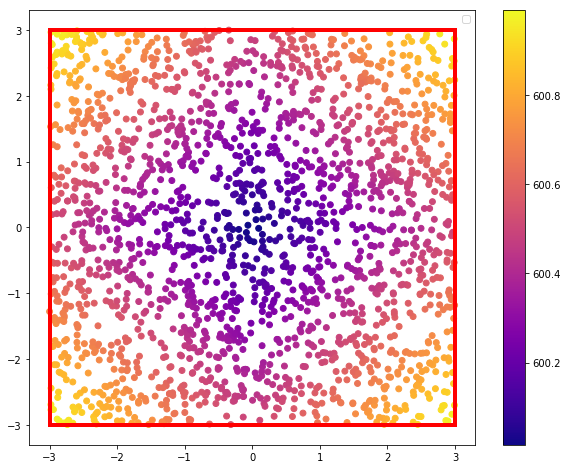

In [19]:

# plot_box(boxes)
import matplotlib.cm as cm

m, M = torch.tensor([[3.0,3.0]]), torch.tensor([[-3.0,-3.0]])
center = m + (M - m)/2
width = F.relu(M - m) 

x1,x2,w,h = m[:,0],m[:,1],M[:,0]-m[:,0], M[:,1]-m[:,1]

plt.figure(figsize=(10,8))
rect=mpatches.Rectangle((x1,x2),w,h, fill = False, color = 'red',linewidth = 4, facecolor=color[0])
plt.gca().add_patch(rect)

x = torch.rand(2000)*6-3
y = torch.rand(2000)*6-3
embed = torch.cat((x.unsqueeze(1),y.unsqueeze(1)),1)

dist_c = torch.norm((embed - center), p=1, dim=-1, keepdim=True)

dist_m = torch.norm((embed - m), p=1, dim=-1,keepdim=True)
dist_M = torch.norm((embed - M), p=1, dim=-1,keepdim=True)
manhattan_dist = torch.norm((M - m),p=1, dim=-1,keepdim=True)
inside = (dist_m + dist_M) <= (manhattan_dist + 1e-4)

dist = (dist_m + dist_M - manhattan_dist)**2

 

dist[inside] = dist_c[inside]/(manhattan_dist/2)
dist[~inside] = dist_c[~inside] + dist[~inside] 
dist = dist + 1e2*F.relu(m-M)

plt.scatter(embed[:,0],embed[:,1], c=list(dist[:,0].numpy()), s=35,cmap='plasma')
# plt.contour([embed[:,0], embed[:,1]], dist[:,0],)
plt.colorbar()

ax = plt.gca()
# ax.relim()
ax.autoscale_view()
plt.legend(loc="upper right")

# plt.savefig('in_box.pdf', bbox_inches='tight', pad_inches=0, dpi=1200)

plt.show()
